In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Google Colab에서 한글 폰트를 설치하고 사용할 수 있도록 설정

!sudo apt-get install -y fonts-nanum # 나눔폰트 설치
!sudo fc-cache -fv # 폰트 캐시 새로 코침
!rm ~/.cache/matplotlib -rf # Matplotlib의 캐시 초기화

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,528 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and dire

In [ ]:
### 아래 셀 실행 후 한글이 안보이면 런타임 다시 시작(보통 처음엔 잘 안됌)
# "런타임" > "세션 다시 시작"
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

### 그래프 기본 설정
plt.style.use('bmh')
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale','Solarize_Light2', 'tableau-colorblind10', '_classic_test']
plt.grid(True, axis='both', color='grey', alpha=0.5, linestyle='--')   # axis='y'
plt.rc('font', family='NanumBarunGothic')

plt.scatter([1,2,3],[1,2,3])    # plt 한글 확인
plt.title('한글 보임')

# 맷플롯립으로 판다스 데이터프레임을 시각화하기


### 데이터프레임의 두 열을 그룹화한 후,  Matplotlib로 시각화하기
* ** 도시별(City)** 제품 판매량(Sales)을 데이터로 만들어 도시별 평균 판매량을 나타내는 막대 그래프를 그리기

<Axes: xlabel='City'>

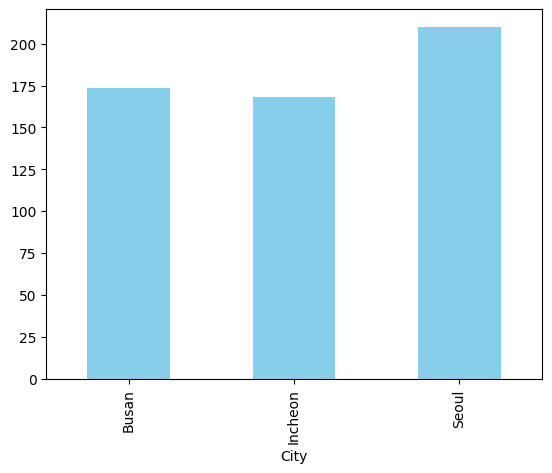

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np       #회귀선 그릴 때 필요한 numpy

# 사전 데이터 생성
data = {
    'City': ['Seoul', 'Seoul', 'Busan', 'Busan', 'Incheon', 'Incheon', 'Seoul', 'Busan', 'Incheon'],
    'Sales': [200, 220, 150, 180, 160, 170, 210, 190, 175]
}

# 판다스 사용을 위한 데이터프레임 변환과 생성
df = pd.DataFrame(data)

# 'City'별로 그룹화하여 평균 'Sales' 계산
city_sales_mean = df.groupby('City')['Sales'].mean()  #도시별 매출액의 평균값을 구해줘.
#판다스의 데이터프레임은 .plot()메서드를 가지고 있어서 맷플롯립 없이도 판다스가 내부적으로 막대 그래프를 그릴 수 있다.

# 막대 그래프 그리기
city_sales_mean.plot(kind='bar', color='skyblue')
plt.title('도시별 평균 매출액')
plt.xlabel('도시')
plt.ylabel('평균 매출액')

plt.show()


### 상관관계  그래프 생성하기(with 회귀선)
* Pandas의 데이터프레임에서 두 열 간의 **상관관계**를 시각화하기 위해 **산점도(scatter plot)**를 사용
* **광고비(Advertising)**와 **매출(Sales)** 간의 상관관계를 시각화하는 산점도 그리기(with 회귀선)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

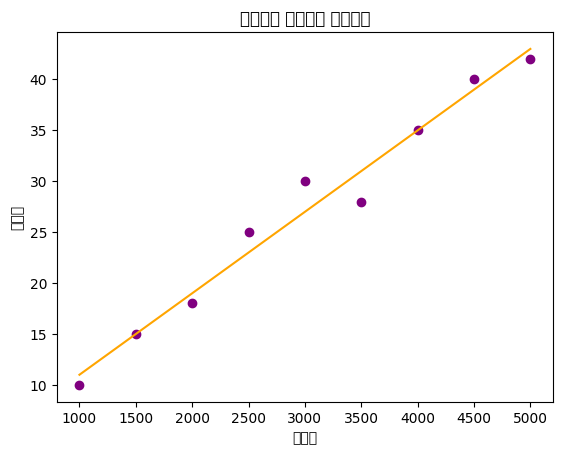

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 사전형 데이터 생성
data = {
    'Advertising': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'Sales': [10, 15, 18, 25, 30, 28, 35, 40, 42]
}
# 데이터프레임 변환과 생성
df = pd.DataFrame(data)

#  회귀선 계산  #여기있는거 그대로 써라
slope, intercept = np.polyfit(df['Advertising'], df['Sales'], 1) #adv가 독립변수이고 sales가 종속변수이다! #순서 바뀌면 안된다.
plt.plot(df['Advertising'], slope * df['Advertising'] + intercept, color='orange', label='회귀선')

# 산점도 그리기
plt.scatter(df['Advertising'], df['Sales'], color='purple')

plt.title('광고비와 매출액의 상관관계')
plt.xlabel('광고비')
plt.ylabel('매출액')

plt.show()

